# 1. Train Model

## 1.1 Build Model

In [ ]:
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, \
                                    Flatten, Conv3D, AveragePooling3D, MaxPooling3D, Dropout, \
                                    Concatenate, GlobalMaxPool3D, GlobalAvgPool3D
from tensorflow.keras.models import Sequential, Model, load_model
import numpy as np

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History 

history = History()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=3,
    mode='min',
    restore_best_weights=True
)

mc = ModelCheckpoint('/content/gdrive/My Drive/IOT_Project/best_model_binary.h5', monitor='val_loss', mode='min')

In [ ]:
my_model_base = keras.applications.mobilenet_v2
my_model = my_model_base.MobileNetV2

input_layer = Input(shape=(224, 224, 3), name='input_layer')
pret_model = my_model(
    input_tensor=input_layer, include_top=False, weights='imagenet', input_shape=(224, 224, 3),
    classes=2)
pret_model.trainable = False

x = pret_model.output
x = layers.GlobalAveragePooling2D()(x)
x = Dense(2, activation='softmax', name='output_fc')(x)
tmodel = Model(inputs=input_layer, outputs=x)

tmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.AUC()])

In [ ]:
tmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

## 1.2. DataLoader

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

datagen = ImageDataGenerator(rescale = 1./255,)
generator1 = datagen.flow_from_directory('/content/gdrive/My Drive/IOT_Project/data/singular/Binary/Train/Augmented', shuffle = True, target_size=(224, 224), batch_size=batch_size, class_mode = 'categorical')
generator2 = datagen.flow_from_directory('/content/gdrive/My Drive/IOT_Project/data/singular/Binary/Vali', shuffle = True, target_size=(224, 224), batch_size=batch_size, class_mode = 'categorical')

#n_img = generator.n
#steps = n_img // batch_size


Found 1142 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


## 1.3 Train &  Save

In [ ]:
tmodel.fit(generator1, validation_data=generator2, batch_size=batch_size, epochs=20, callbacks=[early_stopping, history])
tmodel.save('/content/gdrive/My Drive/cls3_64_binary.h5')

Epoch 1/20
18/18 [==============================] - 112s 6s/step - loss: 0.5337 - auc: 0.8024 - val_loss: 0.3383 - val_auc: 0.9370
Epoch 2/20
18/18 [==============================] - 38s 2s/step - loss: 0.2901 - auc: 0.9539 - val_loss: 0.2360 - val_auc: 0.9689
Epoch 3/20
18/18 [==============================] - 38s 2s/step - loss: 0.2123 - auc: 0.9780 - val_loss: 0.2028 - val_auc: 0.9824
Epoch 4/20
18/18 [==============================] - 38s 2s/step - loss: 0.1680 - auc: 0.9879 - val_loss: 0.1747 - val_auc: 0.9875
Epoch 5/20
18/18 [==============================] - 38s 2s/step - loss: 0.1417 - auc: 0.9921 - val_loss: 0.1634 - val_auc: 0.9910
Epoch 6/20
18/18 [==============================] - 38s 2s/step - loss: 0.1206 - auc: 0.9948 - val_loss: 0.1768 - val_auc: 0.9865
Epoch 7/20
18/18 [==============================] - 38s 2s/step - loss: 0.1100 - auc: 0.9959 - val_loss: 0.1748 - val_auc: 0.9873
Epoch 8/20
18/18 [==============================] - 38s 2s/step - loss: 0.0955 - auc: 0.9

# 2. Evaluate

In [ ]:
tmodel = keras.models.load_model('/content/gdrive/My Drive/cls3_64_binary.h5', compile=False)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 64

datagen = ImageDataGenerator(rescale = 1./255,)
generator3 = datagen.flow_from_directory('/content/gdrive/My Drive/IOT_Project/data/singular/Binary/Test/', shuffle = False, target_size=(224, 224), batch_size=batch_size, class_mode = 'categorical')
generator3.reset()
predict=tmodel.predict_generator(generator3)
y_pred = np.argmax(predict, axis=1)
y_real = generator3.labels

Found 20 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


In [ ]:
print(roc_auc_score(y_real, y_pred))
print(confusion_matrix(y_real, y_pred))

0.95
[[10  0]
 [ 1  9]]


In [ ]:
with open('/content/gdrive/My Drive/IOT_Project/scores1.txt', 'rb') as ff:
    temp_c = ff.readlines()

In [ ]:
bin_list = []
iidx = 1.0
for line in temp_c:
    n_list = [iidx, ]
    for sline in line.decode().replace('\r\n','').split(' - '):
        n_list.append(np.float(sline.split(': ')[1]))
    bin_list.append(n_list)
    iidx += 1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
import pandas as pd
score_df = pd.DataFrame(data=bin_list, columns=['epoch','train_loss','train_auc','vali_loss','vali_auc'])
score_df

,epoch,train_loss,train_auc,vali_loss,vali_auc
0,1.0,0.5337,0.8024,0.3383,0.9370
1,2.0,0.2901,0.9539,0.2360,0.9689
2,3.0,0.2123,0.9780,0.2028,0.9824
3,4.0,0.1680,0.9879,0.1747,0.9875
4,5.0,0.1417,0.9921,0.1634,0.9910
5,6.0,0.1206,0.9948,0.1768,0.9865
6,7.0,0.1100,0.9959,0.1748,0.9873
7,8.0,0.0955,0.9974,0.1501,0.9892
8,9.0,0.0836,0.9982,0.1570,0.9890
9,10.0,0.0779,0.9984,0.1449,0.9898


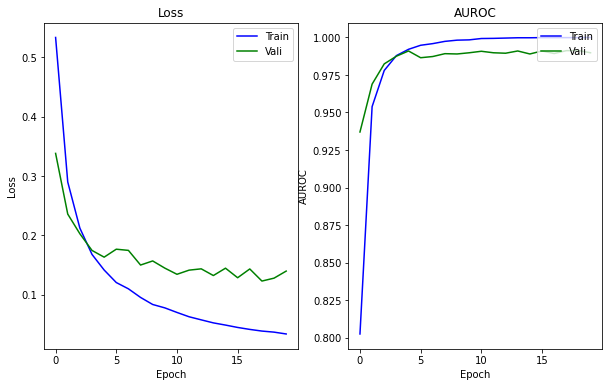

In [ ]:
import matplotlib.pyplot as plt
fig1, axes1 = plt.subplots(1,2, figsize=(10,6))
axes1[0].plot(score_df['train_loss'], c='b', label='Train')
axes1[0].plot(score_df['vali_loss'], c='g', label='Vali')

axes1[1].plot(score_df['train_auc'], c='b', label='Train')
axes1[1].plot(score_df['vali_auc'], c='g', label='Vali')


axes1[0].set_title("Loss")
axes1[1].set_title("AUROC")
axes1[0].set_xlabel("Epoch")
axes1[1].set_xlabel("Epoch")
axes1[0].set_ylabel("Loss")
axes1[1].set_ylabel("AUROC")
axes1[0].legend(loc='upper right')
axes1[1].legend(loc='upper right')


# 3. Compile 

## 3.1 Convert h5 to tflite

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

datagen = ImageDataGenerator(rescale = 1./255)
generator1 = datagen.flow_from_directory('/content/gdrive/My Drive/IOT_Project/data/singular/Binary/Train/Augmented', shuffle = True, target_size=(224, 224), batch_size=batch_size, class_mode = 'categorical')

Found 1142 images belonging to 2 classes.


In [ ]:
steps = generator1.n // batch_size
imgs = []
for i in range(steps//2):
    a, _ = generator1.next()
    imgs.extend(a)

In [ ]:
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices(imgs).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(tmodel)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpno3xlu76/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
# Save the model.
with open('/content/gdrive/My Drive/model_cls3_64_binary.tflite', 'wb') as f:
  f.write(tflite_quant_model)

## 3.2 Compile tflite to edgetpu

In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  68567      0 --:--:-- --:--:-- --:--:-- 68567
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [787 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 ht

In [ ]:
! edgetpu_compiler '/content/gdrive/My Drive/model_cls3_64_binary.tflite'

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 1925 ms.

Input model: /content/gdrive/My Drive/model_cls3_64_binary.tflite
Input size: 2.58MiB
Output model: model_cls3_64_binary_edgetpu.tflite
Output size: 2.79MiB
On-chip memory used for caching model parameters: 2.71MiB
On-chip memory remaining for caching model parameters: 4.98MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 69
Operation log: model_cls3_64_binary_edgetpu.log
See the operation log file for individual operation details.
Compilation child process completed within timeout period.
Compilation succeeded! 


In [ ]:
labels = '\n'.join(sorted(generator1.class_indices.keys()))

with open('/content/gdrive/My Drive/cls2_labels.txt', 'w') as f:
  f.write(labels)